Including USN Academy & Westpoint:
	 y = -0.0630274886904294x + 124569.28069219095 
	average squared error =  55441252.51914611
Excluding USN Academy & Westpoint:
	 y = -0.9047173542087892x + 160003.92167871294 
	average squared error =  34247579.507043324


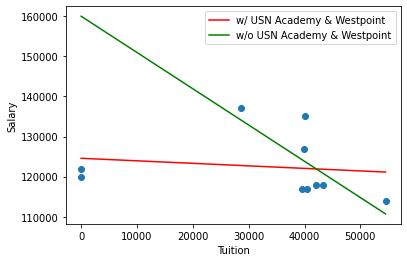

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def main():
  names = ['Princeton', 'Harvey Mudd', 'Caltech', 'MIT', 'Lehigh University', 'NYU-Poly', 'Babson College', 'Standord', 'US Naval Academy', 'Westpoint']
  salaries = np.array([[137000], [135000], [127000], [118000], [118000], [117000], [117000], [114000], [122000], [120000]])
  tuitions = np.array([[28540], [40133], [39900], [42050], [43220], [39565], [40400], [54506], [0], [0]])

  plt.scatter(tuitions, salaries)
  plt.xlabel('Tuition')
  plt.ylabel('Salary')

  out_1 = linreg(tuitions, salaries)
  out_2 = linreg(tuitions[:8], salaries[:8])

  x = np.linspace(tuitions.min(), tuitions.max(), 10)
  y_1 = out_1[1] * x + out_1[0]
  y_2 = out_2[1] * x + out_2[0]

  equation_string_1 = f'y = {out_1[1][0]}x + {out_1[0][0]}'
  equation_string_2 = f'y = {out_2[1][0]}x + {out_2[0][0]}'

  error_1 = calculate_sse(tuitions, out_1, salaries)
  error_2 = calculate_sse(tuitions[:8], out_2, salaries[:8])

  plt.plot(x, y_1, '-r', label='w/ USN Academy & Westpoint')
  plt.plot(x, y_2, '-g', label='w/o USN Academy & Westpoint')
  plt.legend(loc='upper right')

  print('Including USN Academy & Westpoint:\n\t', equation_string_1, '\n\taverage squared error = ', (error_1 / 10))
  print('Excluding USN Academy & Westpoint:\n\t', equation_string_2, '\n\taverage squared error = ', (error_2 / 8))


#function from p.66 of ML textbook
def linreg(inputs,targets):
  inputs = np.concatenate((np.ones((len(inputs),1)), inputs), axis=1)
  coefficients = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(inputs),inputs)), np.transpose(inputs)),targets)

  return coefficients

def calculate_sse(inputs, coefficients, targets):
  inputs = np.concatenate((np.ones((len(inputs),1)), inputs), axis=1)
  error = targets - np.dot(inputs, coefficients)
  sse = np.dot(error.transpose(), error)[0][0]

  return sse

if __name__ == '__main__':
  main()

Discussion of Results: 

Since Westpoint and the USN Academy have no monetary cost I decided to treat them as outliers and ran regression both with and without them. Without them there is a strong negative correlation between tuition and salary meaning that on average (counterinuitively) the more one pays in tuition, the less they will recieve in salary. In comparison, including the military academies makes the line of regression practically flat and increases the average squared error significantly.